# Vendas de jogos de vídeo game

In [137]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


#https://www.kaggle.com/upadorprofzs/eda-video-game-sales/notebook
#dados de jogos com mais de 100.000 cópias vendidas

df = pd.read_csv('vgsales.csv')
df = df.dropna(how='any')

Perguntas: 

1-Plataforma com mais jogos

2-Porcentagem de generos de jogos

3-Top 10 jogos mais vendidos

4-Diferença entre os jogos mais vendidos de ps3 e ps2 (pirataria)

5-Ano com mais lançamentos

6-Região com mais registro de vendas

7-Gráfico com vendas de cada região

8-Top 5 publicadoras que lançaram mais jogos

In [138]:
# 1-Plataforma com mais jogos
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [139]:
# 2-Porcentagem de generos de jogos
generos = df.groupby(['Genre']).count()
generos = generos[['Name']]
generos = generos.rename(columns={'Name':'Quantidade'})
generos['Porcentagem'] = (generos['Quantidade']/generos['Quantidade'].sum())*100
generos = generos.sort_values('Porcentagem', ascending=False)
generos

,Quantidade,Porcentagem
Genre,,
Action,3251,19.955804
Sports,2304,14.142778
Misc,1686,10.349273
Role-Playing,1470,9.023387
Shooter,1282,7.869376
Adventure,1274,7.820269
Racing,1225,7.519489
Platform,875,5.371064
Simulation,848,5.205328


In [140]:
# 3-Top 10 jogos mais vendidos
Top10Vendas = df.groupby('Name')['Global_Sales'].sum()
Top10Vendas.sort_values(ascending=False).head(n=10)

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.72
Name: Global_Sales, dtype: float64

In [141]:
# 4-Diferença entre os jogos mais vendidos de ps3 e ps2 (pirataria)
ps3vendas = df[['Name','Platform','Global_Sales']]
ps3vendas = ps3vendas.loc[df['Platform'] == 'PS3', ['Name','Global_Sales']].head(n=10)
ps3vendas.index = range(1,11)
ps3vendas = ps3vendas.rename_axis("PS3")
ps3vendas.loc[11]=['Total', ps3vendas['Global_Sales'].sum()]
ps3vendas


,Name,Global_Sales
PS3,,
1,Grand Theft Auto V,21.40
2,Call of Duty: Black Ops II,14.03
3,Call of Duty: Modern Warfare 3,13.46
4,Call of Duty: Black Ops,12.73
5,Gran Turismo 5,10.77
6,Call of Duty: Modern Warfare 2,10.69
7,Grand Theft Auto IV,10.57
8,Call of Duty: Ghosts,9.59
9,FIFA Soccer 13,8.24


In [142]:
ps2vendas = df[['Name','Platform','Global_Sales']]
ps2vendas = ps2vendas.loc[df['Platform'] == 'PS2', ['Name','Global_Sales']].head(n=10)
ps2vendas.index = range(1,11)
ps2vendas = ps2vendas.rename_axis("PS2")
ps2vendas.loc[11]=['Total', ps2vendas['Global_Sales'].sum()]
ps2vendas

,Name,Global_Sales
PS2,,
1,Grand Theft Auto: San Andreas,20.81
2,Grand Theft Auto: Vice City,16.15
3,Gran Turismo 3: A-Spec,14.98
4,Grand Theft Auto III,13.10
5,Gran Turismo 4,11.66
6,Final Fantasy X,8.05
7,Need for Speed Underground,7.20
8,Need for Speed Underground 2,6.90
9,Medal of Honor: Frontline,6.83


In [143]:
# 5-Ano com mais lançamentos
ano = df.groupby(['Year']).count()
ano = ano[['Name']]
ano = ano.rename(columns={'Name':'Quantidade'})
ano = ano.sort_values('Quantidade',ascending=False).head(n=10)
ano

,Quantidade
Year,
2009.0,1431
2008.0,1428
2010.0,1257
2007.0,1201
2011.0,1136
2006.0,1008
2005.0,936
2002.0,829
2003.0,775


In [144]:
# 6-Região com mais registro de vendas
regioes = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
regioes.sum()

NA_Sales        4327.65
EU_Sales        2406.69
JP_Sales        1284.27
Other_Sales      788.91
Global_Sales    8811.97
dtype: float64

In [145]:
regioes_c = regioes.copy()
regioes_c.loc['Total'] = regioes_c.sum()
regioes_c

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16594,0.01,0.00,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.00,0.01
16597,0.01,0.00,0.00,0.00,0.01


<AxesSubplot:title={'center':'Vendas por região'}, ylabel='Total'>

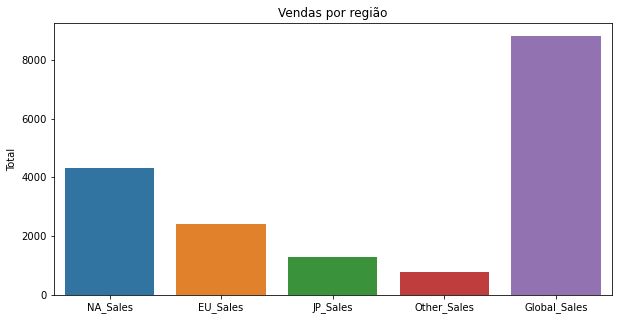

In [146]:
#7-Gráfico com vendas de cada região
total_vendas = regioes.sum().to_frame(name='Total')
total_vendas

plt.pyplot.figure(figsize=(10,5))
plt.pyplot.title('Vendas por região')
sns.barplot(x=total_vendas.index, y=total_vendas['Total'])


In [147]:
#8-Top 5 publicadoras que lançaram mais jogos
publicadora = df.groupby(['Publisher']).count()
publicadora = publicadora[['Name']]
publicadora = publicadora.rename(columns={'Name':'Quantidade'})

publicadora.sort_values('Quantidade',ascending=False).head(n=5)


,Quantidade
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
